In [50]:
# import libraries
import pandas as pd
import warnings


# turn off warnings
warnings.filterwarnings("ignore")

In [51]:
# load the data
df = pd.read_csv('../data/exam/processed/merged_data_with_ratings.csv')

# preview the data
display(df.head())

,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Data preprocessing
# Handle missing values
df['Gender_new'] = df['Age']
display(df.head())
# create a new column 'Age_new' and fill it with random values range from 18 to 76
df['Age_new'] = np.random.randint(18, 76, size=len(df))

# remove $sign from 'TotalSpend' and convert it to float
df['TotalSpent'] = df['TotalSpent'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# remove TotalSpend that is not a number and bfill it with the previous value
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')

,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment,Gender_new
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5,Female
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4,Male
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5,Other
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2,Male
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4,Female


In [54]:
# Data preprocessing
# Handle missing values
df['Gender_new'] = df['Age']
display(df.head())
# create a new column 'Age_new' and fill it with random values range from 18 to 76
df['Age_new'] = np.random.randint(18, 76, size=len(df))

# remove $sign from 'TotalSpend' and convert it to float
df['TotalSpent'] = df['TotalSpent'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# remove TotalSpend that is not a number and bfill it with the previous value
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce')

,CustomerID,Age,Gender,Location,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,LastPurchaseDate,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,GeneratedReview,CustomerSentimentScore,PersonaTag,Churn,llm_sentiment,Gender_new,Age_new
0,4efed90,Female,Denver,CO,Silver,12,753.6,Clothing,2023-10-20,0.065,15.2,Medium,Clicked,"Great experience, love this store!",0.91,Regular Buyer,0,5,Female,24
1,d7f26e8,Male,Los Angeles,CA,Gold,28,2155.4,Electronics,2023-10-25,0.092,22.5,High,Sometimes,Very happy with my purchases.,0.95,Loyal,0,4,Male,63
2,6b4a427,Other,Chicago,IL,Platinum,41,4510.1,Home Goods,2023-09-18,0.115,28.1,High,Clicked,Excellent service and products.,0.98,Loyal,0,5,Other,39
3,68eec52,Male,Houston,TX,Bronze,2,85.7,Books,2023-08-01,0.041,8.9,Low,Not Clicked,"Had some issues, not fully satisfied.",0.52,Window Shopper,1,2,Male,27
4,3a2af82,Female,Phoenix,AZ,Silver,18,1220.5,Beauty,2023-10-10,0.078,18.7,Medium,Clicked,Will definitely buy again.,0.88,Engaged,0,4,Female,36


In [55]:
# Encode categorical variables
le = LabelEncoder()
df['MembershipLevel'] = le.fit_transform(df['MembershipLevel'])
df['FavoriteCategory'] = le.fit_transform(df['FavoriteCategory'])
df['SocialMediaEngagement'] = le.fit_transform(df['SocialMediaEngagement'])
df['AdClickHistory'] = le.fit_transform(df['AdClickHistory'])
df['PersonaTag'] = le.fit_transform(df['PersonaTag'])
df['Gender_new'] = le.fit_transform(df['Gender_new'])

# Select features for the model
features = [
    'Age_new', 'Gender_new', 'MembershipLevel', 'TotalPurchases',
    'TotalSpent', 'FavoriteCategory', 'SocialMediaEngagement',
    'TimeSpentOnSite', 'WebsiteClickRate', 'AdClickHistory',
    'CustomerSentimentScore', 'PersonaTag', 'llm_sentiment'
]
X = df[features]
y = df['Churn']

In [56]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

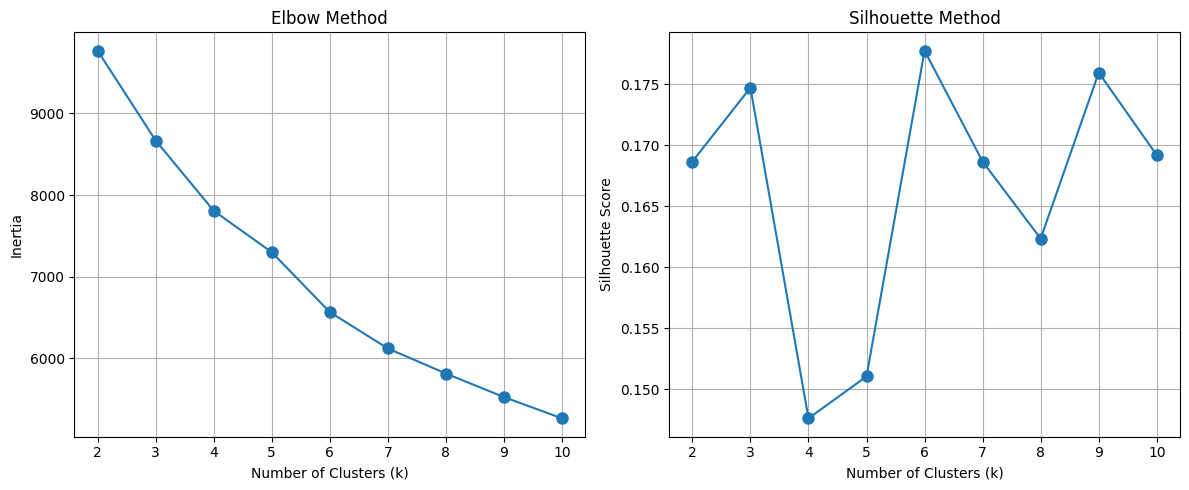

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use the scaled features that you've already prepared
X = X_scaled.copy()

# Determine optimal number of clusters using Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score (only valid for k >= 2)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Elbow Method results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.savefig("../images/elbow_silhouette_plot.png")

In [2]:
# configure api
from dotenv import load_dotenv
import os
from google import genai
from IPython.display import display, Markdown

load_dotenv()
gemini_api_key = os.getenv("GEMINI_API_KEY")

client = genai.Client(api_key=gemini_api_key)

model = [
    "gemini-2.5-flash-preview-04-17-thinking"
]

In [59]:
# Using AI to interpret the confusion matrices
from google.genai import types

with open('../images/elbow_silhouette_plot.png', 'rb') as image_file:
    questionnaire_responses_mood_word_cloud = image_file.read()

# prompt powered by grok-3
prompt = """
You are a data scientist expert, in one paragraph what is the best number of clusters for the dataset based on the Elbow Method and Silhouette Method results.
"""

response = client.models.generate_content(
    model=model[0], 
    contents=[
        types.Part.from_bytes(
            data=questionnaire_responses_mood_word_cloud,
            mime_type='image/png',
        ),
        prompt
    ]
)

display(Markdown(response.text))

Based on the provided plots, the Elbow Method suggests that a reasonable number of clusters could be around k=4 or k=5, as the rate of decrease in inertia begins to slow down significantly around these points, forming an "elbow". The Silhouette Method, which measures how similar an object is to its own cluster compared to other clusters, indicates that the highest silhouette score is achieved at k=6. While there isn't perfect agreement between the two methods, the silhouette score provides a more quantitative measure of cluster quality, suggesting that k=6 results in the best-defined clusters in terms of separation and compactness. Therefore, considering both analyses, k=6 is the most strongly supported number of clusters based on these metrics.


Cluster Centers (Original Scale):


,Age_new,Gender_new,MembershipLevel,TotalPurchases,TotalSpent,FavoriteCategory,SocialMediaEngagement,TimeSpentOnSite,WebsiteClickRate,AdClickHistory,CustomerSentimentScore,PersonaTag,llm_sentiment
Cluster,,,,,,,,,,,,,
0,46.968504,21.078740,0.070866,4.551181,120.196142,13.133858,6.787402,8.448425,0.519055,54.818898,2.656693,45.039370,2.173228
1,46.600746,30.451493,1.507463,71.104478,4371.467873,12.097015,47.776119,76.503358,1.494205,56.735075,1.660933,57.880597,4.750000
2,44.268595,20.809917,2.884298,15.962810,540.631777,10.545455,44.342975,19.859504,0.643095,62.615702,0.960331,39.975207,3.165289
3,52.000000,18.400000,2.250000,20.800000,1455.192500,14.300000,27.550000,14.555000,11.240000,64.850000,84.150000,43.250000,4.150000
4,46.668161,25.869955,0.197309,6.820628,272.632108,15.035874,56.192825,7.502691,0.225861,67.112108,0.692422,41.107623,2.452915



Percentage of churn (1) in each cluster:


Churn,0,1
Cluster,,
0,7.086614,92.913386
1,100.000000,0.000000
2,64.462810,35.537190
3,80.000000,20.000000
4,19.730942,80.269058


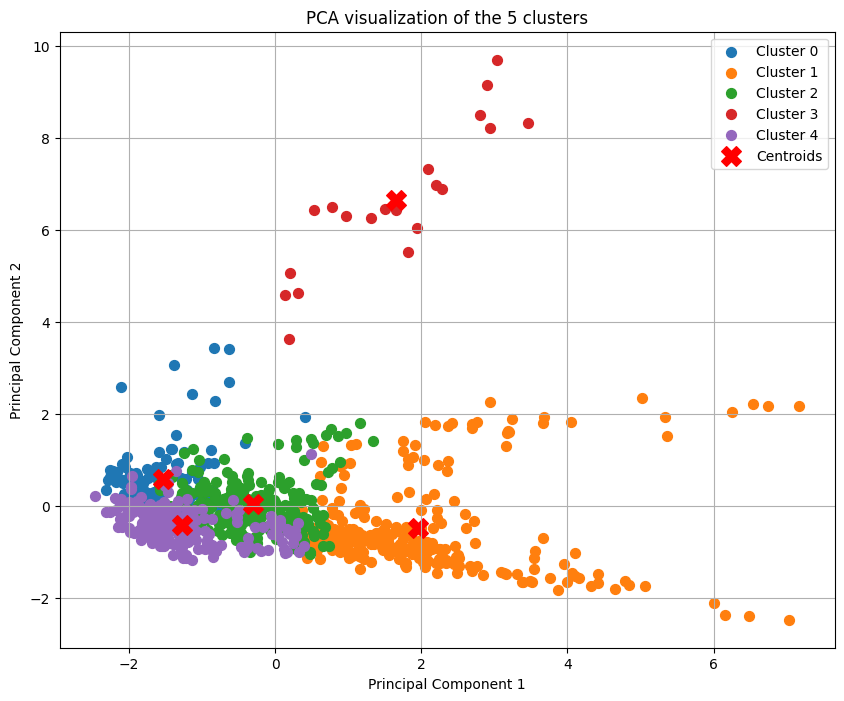

In [60]:
# Based on the elbow method and silhouette scores, choose optimal k

optimal_k = 5

# Apply K-means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Examine cluster characteristics - only use the numeric features that were used in clustering
cluster_stats = df.groupby('Cluster')[features].mean()
print("\nCluster Centers (Original Scale):")
display(cluster_stats)

# Visualize clusters using PCA to reduce to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
for i in range(optimal_k):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], 
                label=f'Cluster {i}', s=50)

plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=200, marker='X', c='red', label='Centroids')

plt.title(f'PCA visualization of the {optimal_k} clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.savefig("../images/pca_clusters.png")

# Examine relationship between clusters and churn outcome
cluster_outcome = pd.crosstab(df['Cluster'], df['Churn'], normalize='index') * 100
print("\nPercentage of churn (1) in each cluster:")
display(cluster_outcome)

In [4]:
# Using AI to interpret the confusion matrices
from google.genai import types

with open('../images/pca_clusters.png', 'rb') as image_file:
    questionnaire_responses_mood_word_cloud = image_file.read()

# prompt powered by grok-3
prompt = """
You are a data scientist expert, in one paragraph what is the best number of clusters for the dataset based on the Elbow Method and Silhouette Method results.
"""

response = client.models.generate_content(
    model=model[0], 
    contents=[
        types.Part.from_bytes(
            data=questionnaire_responses_mood_word_cloud,
            mime_type='image/png',
        ),
        prompt
    ]
)

display(Markdown(response.text))

Based on the provided image, which is a PCA visualization of a clustering result using 5 clusters, it is shown how data points and their assigned centroids are distributed in a 2D space. However, this plot alone does not provide the necessary information from standard metrics like the Elbow Method or the Silhouette Method to definitively determine the *optimal* number of clusters for the dataset. The Elbow Method typically looks for a point where the rate of decrease in inertia sharply changes, while the Silhouette Method assesses how well each point fits its cluster compared to others; the results of these methods are usually presented as separate plots or scores for varying numbers of clusters, which are not included here. Therefore, without access to the actual results from the Elbow Method and Silhouette Method, it is not possible to conclude what the best number of clusters is based on those criteria, although the plot visualizes the spatial separation achieved with a 5-cluster solution.